In [98]:
import matplotlib as plt
import numpy as np
from qiskit import *
import math

Example of basis encoding of a classical N-bit string

f.e x = 5 => is a 4bit string 0101 and can be represented by a 4 qubit system |0101> 
In general |x> = |b1,b2,...,bN> bN is 0 or 1

Let's encode the dataset X1 = 101 and X2 = 111 which can be encoded in the state |X> (|101> + |111>) / sqrt(2)

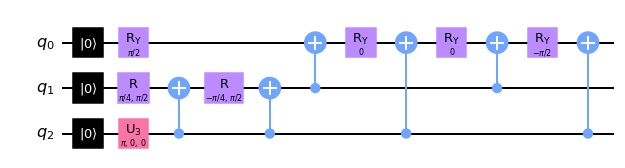

In [99]:
state = [
    0, # 000
    0, # 001
    0, # 010
    0, # 011
    0, # 100
    1 / np.sqrt(2), # 101
    0, # 110
    1 / np.sqrt(2), # 111
]

# for a 3 bit encoding we use 3 qubits 
circuit = QuantumCircuit(3)
circuit.initialize(state, [0, 1, 2])

circuit.decompose().decompose().decompose().decompose().decompose().draw('mpl')

Amplitude encoding encodes data into the amplitudes of a quantum state

Encoding dataset X X1 = (1.5, 0), X2 = (-2, 3)

We concatenate all datapoints into one vecotr and normalizing leads to
|X> = (1 / sqrt(15.25)) (1.5|00> + 0|01> -2|10> + 3|11>)

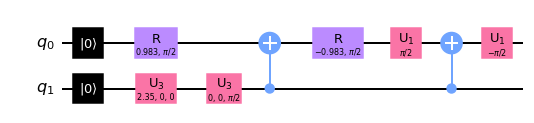

In [100]:
state = [
    1 / np.sqrt(15.25) * 1.5,
    0,
    1 / np.sqrt(15.25) * -2,
    1 / np.sqrt(15.25) * 3]

# initialize circuit, in this example for 4 states we need log2(4) = 2 qubits
circuit = QuantumCircuit(2)
circuit.initialize(state, [0, 1])

circuit.decompose().decompose().decompose().decompose().decompose().draw('mpl')

Angle encoding encodes N fearure data into rotations angles of n qubits
Encoding data x = (0, pi/4, pi/2), if we encode 1 feature per angle we will need 3 qubits

There is also dense angle encoding, one feature will be the angle and the other will be as a relative phase to eigenstate |1>, this is not implemented here

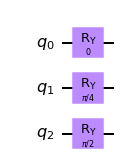

In [101]:
# create qubit
circuit = QuantumCircuit(3)

# apply rotations for the 3 features
circuit.ry(0, 0)
circuit.ry(math.pi / 4, 1)
circuit.ry(math.pi / 2, 2)

circuit.draw('mpl')

Arbitrary encoding encodes N features as rotations on N parameterized gates on n qubits m < N
We will use an qiskit's circuit EfficientSU2 to encode 12 fearures

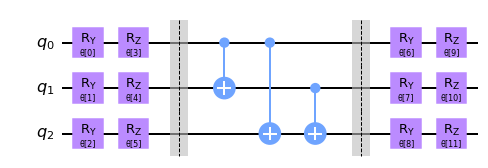

In [102]:
from qiskit.circuit.library import EfficientSU2

circuit = EfficientSU2(3, reps = 1, insert_barriers = True)

circuit.decompose().draw('mpl')

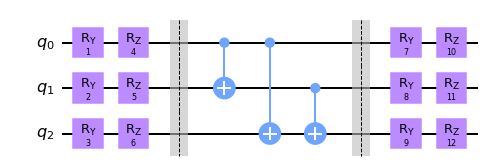

In [103]:
# Now that we have the circuit ready, we can bind the parameters
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

encode = circuit.bind_parameters(x)
encode.decompose().draw('mpl')